In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plotly as py
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.offline.init_notebook_mode(connected=True)

## 1) Consumer Spending vs Employment vs Unemployement Claims at AZ vs CO vs National Level

In [2]:
consum_spend_state = pd.read_csv('data/Affinity - State - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})
consum_spend_national = pd.read_csv('data/Affinity - National - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})

employ_state = pd.read_csv('data/Employment - State - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})
employ_nat = pd.read_csv('data/Employment - National - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})

ui_claim_state = pd.read_csv('data/UI Claims - State - Weekly.csv', parse_dates={'date': ['year', 'month', 'day_endofweek']})
ui_claim_nat = pd.read_csv('data/UI Claims - National - Weekly.csv', parse_dates={'date': ['year', 'month', 'day_endofweek']})

#### Consumer Spending

In [3]:
consum_spend_state.head() # spend_all for AZ and CO and Nat
consum_spend_national.head()

,date,freq,spend_acf,spend_aer,spend_all,spend_apg,spend_grf,spend_hcs,spend_tws,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_all_q2,spend_all_q3,spend_retail_no_grocery,spend_retail_w_grocery,provisional
0,2019-01-07,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0
1,2019-01-08,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0
2,2019-01-09,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0
3,2019-01-10,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0
4,2019-01-11,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0


In [4]:
consum_spend_st_non_null = consum_spend_state.loc[consum_spend_state.loc[:, 'spend_all'] != '.']

consum_spend_az = consum_spend_st_non_null.loc[consum_spend_st_non_null.loc[:, 'statefips'] == 4]
consum_spend_co = consum_spend_st_non_null.loc[consum_spend_st_non_null.loc[:, 'statefips'] == 8]
# options = [4, 8]
# consum_spend_az_co = consum_spend_st_non_null.loc[consum_spend_st_non_null.loc[:, 'statefips'].isin(options)]
consum_spend_nat = consum_spend_national.loc[consum_spend_state.loc[:, 'spend_all'] != '.']
#consum_spend_nat_nn.insert(loc=1, column='statefips', value=0)
state_list = ['spend_acf', 'spend_aer', 'spend_all', 'spend_apg', 'spend_grf', 'spend_hcs', 'spend_tws', 'spend_all_inchigh', 'spend_all_inclow', 'spend_all_incmiddle', 'spend_retail_w_grocery', 'spend_retail_no_grocery']
nat_list = ['spend_acf', 'spend_aer', 'spend_all', 'spend_apg', 'spend_grf', 'spend_hcs', 'spend_tws', 'spend_all_inchigh', 'spend_all_inclow', 'spend_all_incmiddle', 'spend_all_q2', 'spend_all_q3', 'spend_retail_no_grocery', 'spend_retail_w_grocery']

In [5]:
for col in state_list:
    
    consum_spend_az.loc[:, col] = pd.to_numeric(consum_spend_az.loc[:, col])

/home/bobbyhuck/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
for col in state_list:
    
    consum_spend_co.loc[:, col] = pd.to_numeric(consum_spend_co.loc[:, col])

In [7]:
for col in nat_list:
    
    consum_spend_nat.loc[:, col] = pd.to_numeric(consum_spend_nat.loc[:, col])

In [8]:
# consumer_spending = pd.merge(consum_spend_az_co, consum_spend_nat_nn, how='outer')

In [9]:
spend_incomes = ['spend_all_inchigh', 'spend_all_inclow', 'spend_all_incmiddle']
spend_industry = ['spend_acf', 'spend_aer', 'spend_apg', 'spend_grf', 'spend_hcs', 'spend_tws']
spend_retail = ['spend_retail_w_grocery', 'spend_retail_no_grocery']

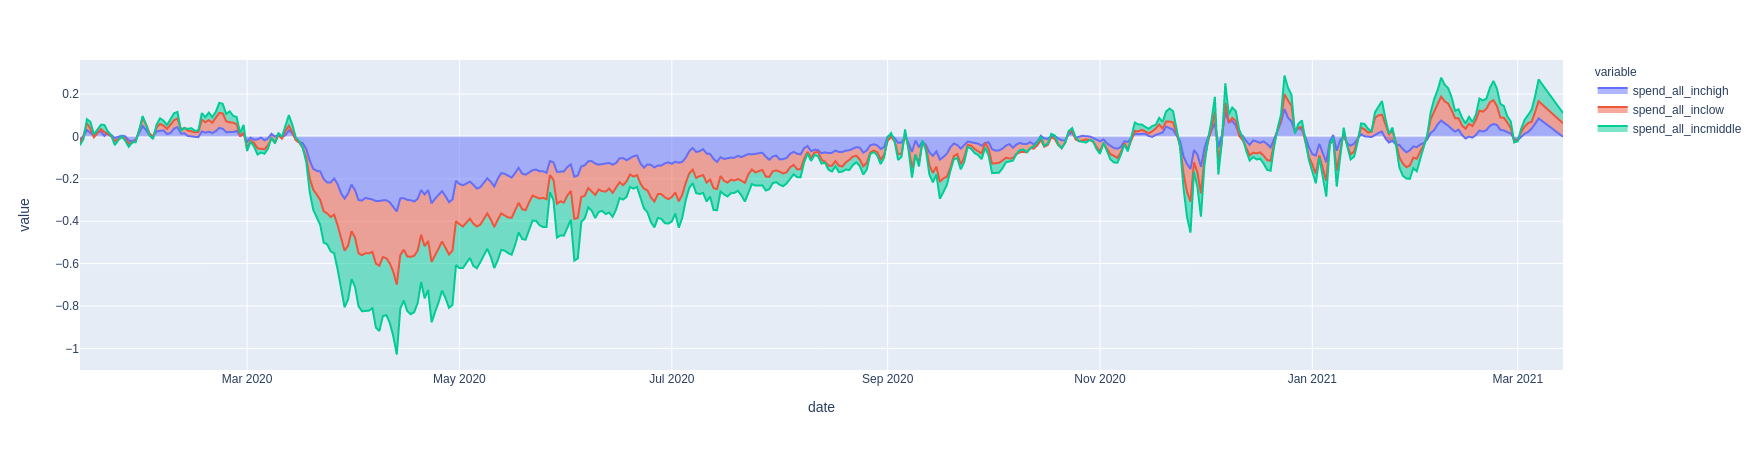

In [10]:
px.area(consum_spend_az, x='date', y=spend_incomes)

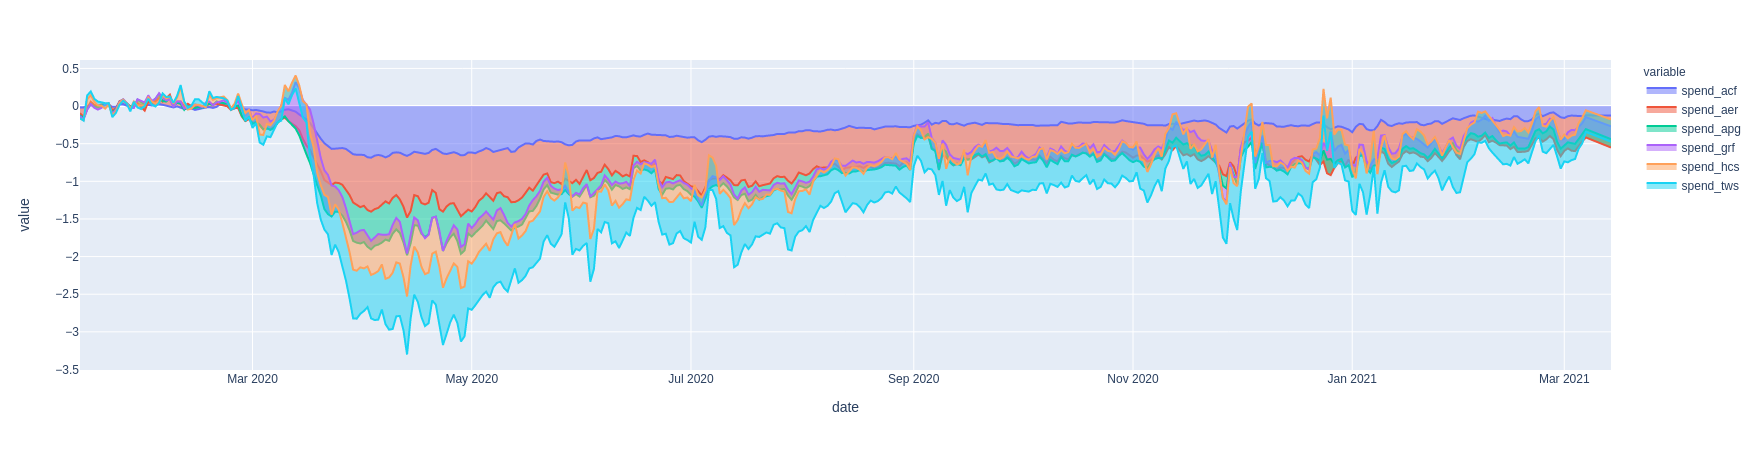

In [11]:
px.area(consum_spend_az, x='date', y=spend_industry)

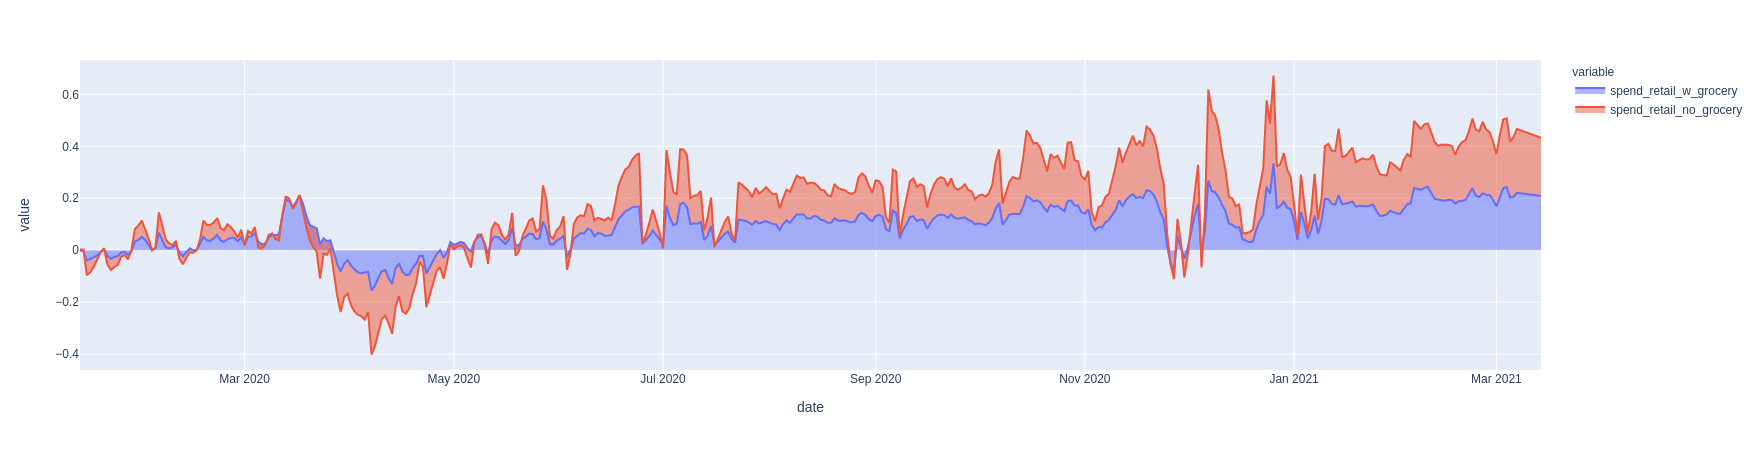

In [12]:
px.area(consum_spend_az, x='date', y=spend_retail)

In [13]:
# df = px.data.stocks()
# fig = px.line(df, x="date", y=df.columns,
#               hover_data={"date": "|%B %d, %Y"},
#               title='custom tick labels')
# fig.update_xaxes(
#     dtick="M1",
#     tickformat="%b\n%Y")
# fig.show()

#### Employment

In [51]:
employ_state.replace(to_replace='.', value=np.nan, inplace=True)
employ_nat.replace(to_replace='.', value=np.nan, inplace=True)

employ_state_list = ['emp_combined_inclow', 'emp_combined_inchigh', 'emp_combined_ss40', 'emp_combined_ss65', 'emp_combined_ss70']
employ_nat_list = ['emp_combined_ss40', 'emp_combined_ss60', 'emp_combined_ss65', 'emp_combined_ss70', 'emp_combined_retail', 'emp_combined_retail_inclow', 'emp_combined_retail_incmiddle', 'emp_combined_retail_inchigh']

In [ ]:
for col in employ_state_list:
    
    employ_state.loc[:, col] = pd.to_numeric(employ_state.loc[:, col])

In [16]:
for col in employ_nat_list:
    
    employ_nat.loc[:, col] = pd.to_numeric(employ_nat.loc[:, col])

In [30]:
# employ_state = employ_state.loc[employ_state.loc[:, :] == float]
# funct = (lambda x: float('Nan'))
#if x == '.' else continue

employ_state.replace(to_replace='.', value=np.nan, inplace=True)
employ_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19839 entries, 0 to 19838
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    19839 non-null  datetime64[ns]
 1   statefips               19839 non-null  int64         
 2   emp_combined            19839 non-null  float64       
 3   emp_combined_inclow     18283 non-null  object        
 4   emp_combined_incmiddle  19839 non-null  float64       
 5   emp_combined_inchigh    17505 non-null  object        
 6   emp_combined_ss40       19450 non-null  object        
 7   emp_combined_ss60       19839 non-null  float64       
 8   emp_combined_ss65       19061 non-null  object        
 9   emp_combined_ss70       19450 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.5+ MB


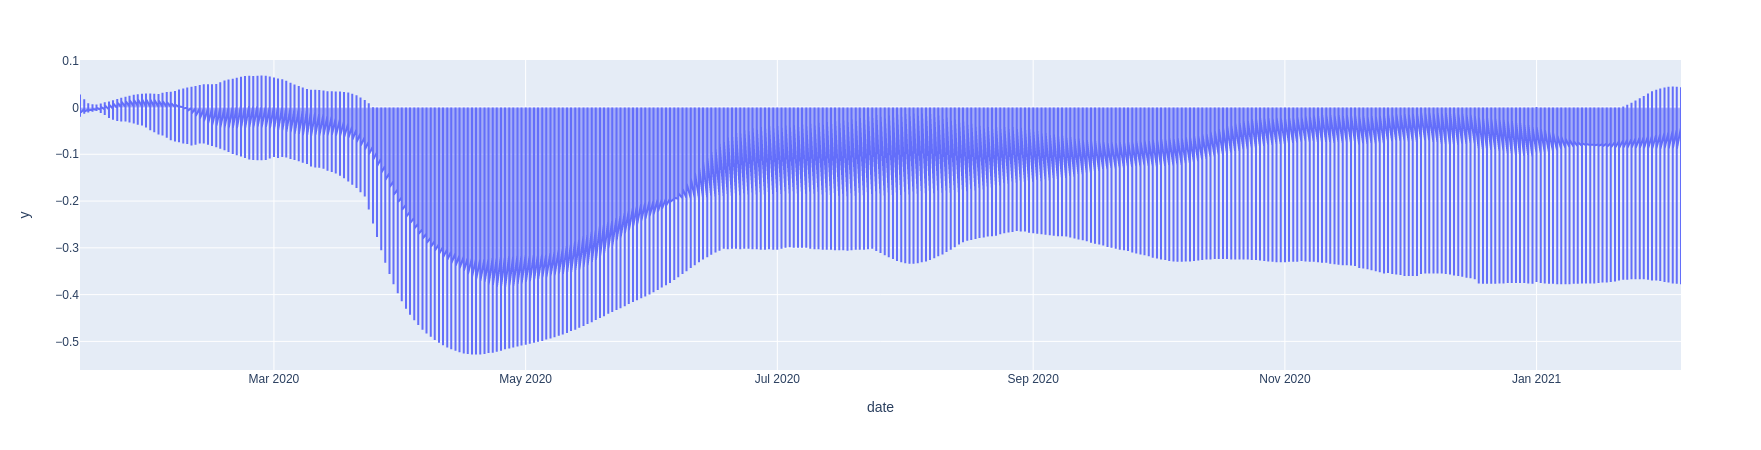

In [44]:
px.area(employ_state, x='date', y=to_num)

In [42]:
var = employ_state.loc[:,'emp_combined_inclow']
type(var)
to_num = pd.to_numeric(var)

type(to_num[0])
# var2 = employ_state.loc[0,'emp_combined_inclow']
# type(var2)

numpy.float64

In [ ]:
for col in state_list:
    
    consum_spend_co.loc[:, col] = pd.to_numeric(consum_spend_co.loc[:, col])

In [ ]:
employ_state.loc[:, 'emp_combined_inclow'] = employ_state.loc[:, 'emp_combined_inclow'].astype('float')
employ_state.info()

In [ ]:
emp_nat_lst = ['emp_combined_ss40', 'emp_combined_ss60', 'emp_combined_ss65', 'emp_combined_ss70', 'emp_combined_retail', 'emp_combined_retail_inclow', 'emp_combined_retail_incmiddle', 'emp_combined_retail_inchigh']
emp_st_lst = ['emp_combined_inclow', 'emp_combined_inchigh', 'emp_combined_ss40', 'emp_combined_ss65', 'emp_combined_ss70']

In [ ]:
for col in emp_st_lst:
    
    if type(col) == 'str': continue
    employ_state.loc[:, col] = pd.to_numeric(employ_state.loc[:, col])

In [ ]:
for col in emp_nat_lst:
    
    employ_nat.loc[:, col] = pd.to_numeric(employ_nat.loc[:, col])

In [ ]:
employ_az = employ_state.loc[employ_state.loc[:, 'statefips'] == 4]
employ_co = employ_state.loc[employ_state.loc[:, 'statefips'] == 8]

employ_nat.info()

In [ ]:
employ_nat.loc[]

In [ ]:
#px.line(employ_az, x='date', y='emp_combined', labels={'x': 'Date', 'y': 'Combined Employment'})

px.line(data_frame=employ_nat, x='date', y=['emp_combined_inclow', 'emp_combined_inchigh'])

#### Unemployment Claims

In [ ]:
ui_claim_az = ui_claim_state.loc[ui_claim_state.loc[:, 'statefips'] == 4]
ui_claim_co = ui_claim_state.loc[ui_claim_state.loc[:, 'statefips'] == 8]
ui_claim_co
ui_claim_nat

## 2) Time Outside Home vs COVID-19 at AZ vs CO vs National Level

In [ ]:
time_outside_state = pd.read_csv('data/Google Mobility - State - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})
time_outside_nat = pd.read_csv('data/Google Mobility - National - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})

covid_state = pd.read_csv('data/COVID - State - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})
covid_nat = pd.read_csv('data/COVID - National - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})

#### Time Outside Home

In [ ]:
time_outside_az = time_outside_state.loc[time_outside_state.loc[:, 'statefips'] == 4]
time_outside_co = time_outside_state.loc[time_outside_state.loc[:, 'statefips'] == 8]

time_outside_nat

In [ ]:
# plot this stuff

#### COVID-19

In [ ]:
covid_state
covid_az = covid_state.loc[covid_state.loc[:, 'statefips'] == 4]
covid_co = covid_state.loc[covid_state.loc[:, 'statefips'] == 8]

covid_nat

In [ ]:
# plot this stuff

In [ ]:
fig = 

## 3) Job Postings vs 